In [4]:
!pip install tensorflow version==2.10
from importlib import import_module

import tensorflow as tf
print(tf.__version__)

from keras.api._v2 import keras as KerasAPI
# using the import module import the tensorflow.keras module'
# and typehint that the type is KerasAPI module
keras: KerasAPI = import_module("tensorflow.keras")

from keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement version==2.10 (from versions: 0.1.0, 0.1.1)
ERROR: No matching distribution found for version==2.10
2.9.2


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# import fasttext

# bio_model = fasttext.load_model('./BioWordVec_PubMed_MIMICIII_d200.bin')

In [85]:
def col4_preprocessing(path, save_path=None, ci_words=('Clinical information', 'CI', 'History', 'C.I', '* CI')):
    import numpy as np
    import pandas as pd

    null_val = 'None'

    # ci, finding split
    df = pd.read_csv(path, header=0, encoding='euc-kr')

    # debuging
    # df = df.iloc[560:561, :]

    ci_ls, finding, new_finding, new_con = list(), list(), list(), list()
    findings = df.iloc[:,0].str.replace('\n','\r').str.split('\r')
    val_point = 0
    for idx, c in enumerate(findings): # ci + finding를 줄단위로 나눈 리스트
        val_point = 0
        if isinstance(c, list):
            for i, s in enumerate(c): # 줄단위로 나눈 리스트에서 각 문장 s는 str형
                ci = s.startswith(ci_words) # 이걸로 시작하는 문장만 추출
                '''error 발생'''
                # print(s)
                # print(type(s))
                # print(c)
                # print('-------')
                if ci == True and val_point == 0:
                    ci_ls.append(s)
                    # print(ci_ls)
                    c.remove(s)
                    # print(c)

                    # type이 list고 len이 1인 c 안에 원소가 str. ''
                    if '' in c: # error 부분
                        # print(c)
                        # print('type(c):', type(c))
                        # print('len(c):', len(c))
                        # print(type(c[0]))
                        finding.append(c)
                        # print('error1')
                    else:
                        finding.append(null_val)
                        # print('error2')
                    val_point += 1
                else:
                    pass
                
            if val_point == 0:
                ci_ls.append(null_val)
                finding.append(c)
  
        else:
            ci_ls.append(null_val)
            finding.append(null_val)
        ''''''

    # print(len(finding))
    # print(finding)
    # finding 전처리
    for ls in finding:
        # print('in finding:', ls)
        if isinstance(ls, list) == False:
            new_finding.append(null_val)
            continue
        # elif len(ls) == 1: # error 의심
        #     # print(ls)
        #     print('--------')
        #     for i in ls:
        #         # print('i is :', i)
        #         # print(type(i))
        #         # print(len(i))
        #         if len(i) == 0:
        #             print('i :', i)
        #             print('======')
        #             continue
        else:
            find = ''
            for val in ls:
                if len(val) > 2:
                    find = find + ' ' + val
                else:
                    pass
        
        if find is not '':
            new_finding.append(find)
        else:
            new_finding.append(null_val)

    # conclusion 전처리
    cons = df.iloc[:,1].str.replace('\n','\r').str.split('\r')
    for ls in cons:
        if isinstance(ls, list):
            con = ''
            for val in ls:
                if len(val) > 1:
                    con = con + ' ' + val
                else:
                    pass
            new_con.append(con)
    
        else:
            new_con.append(null_val)

    print(len(ci_ls))
    print(len(new_finding))
    print(len(new_con))
    print(len(df['AcuteInfarction'].tolist()))
    # 4 columns
    new_df = pd.DataFrame(
        {'CI':ci_ls, 'Findings':new_finding, 'Conclusion':new_con, 'Label':df['AcuteInfarction'].tolist()})
    
    # save to csv
    if save_path:
        new_df.to_csv(save_path, encoding="euc-kr", index=False)

    return new_df

In [86]:
df = col4_preprocessing("/content/drive/MyDrive/AI_contest/train_set_no_duplicates.csv")
df.head(10)

['', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image 획득하였으며 조영증강은 시행하지 않았음.', '', '', '']
['Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image 획득하였으며 조영증강을 시행함.', '']
['', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image 획득하였으며 조영증강을 시행함.', '']
['', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image 획득하였으며 조영증강을 시행함.', '', '', '']
['', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image, axial DWI, intracranial TOF MRA 획득하였으며 neck MRA에 대해서 조영증강을 시행함.', '']
['', '', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image, intracranial TOF MRA 획득하였으며 brain 및 neck MRA에 대해 조영증강을 시행함.', '', '', '', '대뇌, 소뇌, 뇌간, 뇌실, 뇌실질 외 공간에 출혈, 종괴, 수두증, 위축, 과거의 허혈성 병변 등의 주요 이상 소견 없음.', '', '', '', 'Circle of Willis의 주요 뇌동맥과 경동맥에 협착, 폐쇄, 동맥류 소견 없음.', '']
['', '', '', 'Axial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image 획

,CI,Findings,Conclusion,Label
0,Clinical information : 두부외상 후 후유증 평가,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",1. Encephalomalacic change in both frontal lo...,0
1,Clinical information : lung cancer,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",1. No change of focal enhancing lesion in lef...,0
2,Clinical information : Multiple Sclerosis,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",No significant interval change of abnormal hy...,0
3,Clinical information : patient with DLBCL.,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",1. Decreased extent of enhancing mass in the ...,0
4,Clinical information : Transient cerebral isch...,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...","1. Acute infarctions at right BG, right F-P-T...",1
5,Clinical information : pulsatile tinitus,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",Normal brain MRI.,0
6,Clinical information : Lung cancer,"Axial T1WI, sagittal T1WI, axial T2WI, axial ...",1. No definite evidence of brain metastasis. ...,0
7,None,None,mild diffuse brain atrophy complete occlusion...,0
8,"CI, r/o DAI, r/o HIE","(multiple trauma, cardiac arrest) Axial T2* ...","1. No evidence of acute infarctions, hypoxic ...",0
9,Clinical information : 사고 당시 LOC (+),"r/o diffusion axnoal injury Axial T1WI, sagit...","1. Diffuse brain atrophy. 2. Sinusitis, both ...",0


In [87]:
df.iloc[560:561, :]

,CI,Findings,Conclusion,Label
560,Clinical information : Dementia in alzheimer's...,None,"Old infarctions at both BG, left frontal lobe...",0


In [309]:
import pandas as pd
import numpy as np

df = col4_preprocessing("/content/drive/MyDrive/AI_contest/train_set_no_duplicates.csv")
display(df)

Clinical information : Dementia in alzheimer's disease with late onset
<class 'str'>
["Clinical information : Dementia in alzheimer's disease with late onset", '']
-------
["Clinical information : Dementia in alzheimer's disease with late onset"]
['']
type(c): <class 'list'>
len(c): 1
<class 'str'>
error1
in finding: ['']
i is : 
<class 'str'>
0


,CI,Findings,Conclusion,Label
0,Clinical information : Dementia in alzheimer's...,None,"Old infarctions at both BG, left frontal lobe...",0


In [310]:
ori_df = pd.read_csv('/content/drive/MyDrive/AI_contest/train_set_no_duplicates.csv', encoding='euc-kr')
ori_df.head(10)

,Findings,Conclusion\n,AcuteInfarction
0,Clinical information : 두부외상 후 후유증 평가\r\n\r\nAx...,1. Encephalomalacic change in both frontal lob...,0
1,Clinical information : lung cancer\nAxial T1WI...,1. No change of focal enhancing lesion in left...,0
2,Clinical information : Multiple Sclerosis\r\n\...,No significant interval change of abnormal hyp...,0
3,Clinical information : patient with DLBCL.\r\n...,1. Decreased extent of enhancing mass in the l...,0
4,Clinical information : Transient cerebral isch...,"1. Acute infarctions at right BG, right F-P-T ...",1
5,Clinical information : pulsatile tinitus\n\r\n...,Normal brain MRI.\n,0
6,Clinical information : Lung cancer \r\n\r\nAxi...,1. No definite evidence of brain metastasis.\r...,0
7,NaN,mild diffuse brain atrophy\r\ncomplete occlusi...,0
8,"CI, r/o DAI, r/o HIE \r\n (multiple trauma, ca...","1. No evidence of acute infarctions, hypoxic i...",0
9,Clinical information : 사고 당시 LOC (+)\nr/o diff...,"1. Diffuse brain atrophy.\r\n2. Sinusitis, bot...",0


In [ ]:
df_conc = df['Conclusion'].astype('str').apply(lambda x : x.lower())

In [314]:
df_conc.replace(['lobe.'], ['lobe'], regex=True, inplace=True)
df_conc.replace(['microangiopathy.'], ['microangiopathy'], regex=True, inplace=True)
df_conc.replace(['rt'], ['right'], regex=True, inplace=True)
df_conc.replace(['lt'], ['left'], regex=True, inplace=True)

In [315]:
df_find = df['Findings']
# df_find.replace(['\r\n\n'], ['None'], regex=True, inplace=True)
df_find = df_find.astype('str').apply(lambda x : x.lower())

In [316]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation

nltk.download('stopwords')
stop_words = set(stopwords.words('english')).union(set(punctuation))
stop_words = stop_words.union(('2.', '1.', '3.', '4.', '5.', '--'))
tokenizer = TreebankWordTokenizer()

tokens_find = []
tokens_conc = []

for i in range(len(df)): # length of the dataframe
    sent1 = tokenizer.tokenize(str(df_find[i]))
    for w1 in sent1:
        if w1 not in stop_words:
            tokens_find.append(w1)
            
    sent2 = tokenizer.tokenize(str(df_conc[i]))
    for w2 in sent2:
        if w2 not in stop_words:
            tokens_conc.append(w2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [317]:
en_find = nltk.Text(tokens_find)
en_conc = nltk.Text(tokens_conc)
print(len(en_conc.tokens)) # returns number of unique tokens
print(len(set(en_conc.tokens)))
en_conc.vocab()                  # returns frequency distribution

18
17


FreqDist({'lobe': 2, 'encephalomalacic': 1, 'change': 1, 'frontal': 1, 'left': 1, 'temporal': 1, 'old': 1, 'infarctions': 1, 'bg.': 1, 'microangiopathy': 1, ...})

In [318]:
target = df.pop('Label')

In [319]:
target.value_counts()

0    1
Name: Label, dtype: int64

In [320]:
df_ = np.stack((pd.DataFrame(df_find), pd.DataFrame(df_conc)), axis=-1)

ValueError: ignored

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_, target, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False) #~ 0.25 x 0.8 = 0.2

In [180]:
x_train_find = X_train[...,0,0]
x_test_find = X_test[...,0,0]
x_val_find = X_val[...,0,0]

x_train_conc = X_train[...,0,1]
x_test_conc = X_test[...,0,1]
x_val_conc = X_val[...,0,1]

In [181]:
train_ds_find = tf.data.Dataset.from_tensor_slices((x_train_find, y_train))
train_ds_conc = tf.data.Dataset.from_tensor_slices((x_train_conc, y_train))

val_ds_find = tf.data.Dataset.from_tensor_slices((x_val_find, y_val))
val_ds_conc = tf.data.Dataset.from_tensor_slices((x_val_conc, y_val))

test_ds_find = tf.data.Dataset.from_tensor_slices((x_test_find, y_test))
test_ds_conc = tf.data.Dataset.from_tensor_slices((x_test_conc, y_test))

In [182]:
import tensorflow as tf
from keras import layers

tf.config.run_functions_eagerly(True)
def custom_split_fn(string_tensor):
    print(string_tensor)
    if tf.is_tensor(string_tensor):
        string_numpy = string_tensor.numpy().decode()
    else:
        string_numpy = string_tensor.decode()
    string_split_lst = [w for w in tokenizer.tokenize(string_numpy) if w not in stop_words]
    return tf.ragged.constant(string_split_lst)

In [183]:
max_tokens, max_length = 17000, 600

### CI만 있는 경우 오류 발생

In [184]:
find_text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
    standardize=None,
    ngrams=2,
    split=custom_split_fn
)

text_only_train_ds_find = train_ds_find.map(lambda x, y: x)
find_text_vectorization.adapt(text_only_train_ds_find)

tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\

ValueError: ignored

In [ ]:
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'  (multiple trauma, cardiac arrest) axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. no evidence of restricted diffusion in the brain. extensive lt. mastoid effusion. --> r/o mastoiditis. no evidence of microhemorrhages in the brain. microangiopathy.', shape=(), dtype=string)
tf.Tensor(b' r/o diffusion axnoal injury axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable. * note: a developmental venous anomaly at the left basal ganglia. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' white matter tract evaluation\xec\x9c\x84\xed\x95\xb4 diffusion tensor imaging \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' 1. \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95 \xec\xa0\x84\xed\x9b\x84\xec\x9d\x98 \xec\x98\x81\xec\x83\x81\xec\x97\x90\xec\x84\x9c \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88\xec\x97\x90 \xec\x9d\xb4\xec\x83\x81 \xec\x8b\xa0\xed\x98\xb8\xeb\x8a\x94 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xec\xa7\x80 \xec\x95\x8a\xea\xb3\xa0, \xeb\xb0\xb1\xec\xa7\x88-\xed\x9a\x8c\xec\x83\x89\xec\xa7\x88\xec\x9d\x98 \xea\xb5\xac\xeb\xb6\x84\xeb\x8f\x84 \xec\x9e\x98 \xeb\x90\x98\xea\xb3\xa0 \xec\x9e\x88\xeb\x8b\xa4. 2. \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xec\x86\xa1\xea\xb3\xbc\xec\xb2\xb4, \xeb\x87\x8c\xed\x95\x98\xec\x88\x98\xec\xb2\xb4, \xed\x95\xb4\xeb\xa9\xb4\xec\xa0\x95\xeb\xa7\xa5\xeb\x8f\x99, \xec\x8b\x9c\xec\x8b\xa0\xea\xb2\xbd\xeb\xa1\x9c  \xeb\x93\xb1\xec\x97\x90\xeb\x8f\x84 \xec\x9d\xb4\xec\x83\x81\xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. 3. \xeb\x87\x8c\xec\x8b\xa4\xec\x9d\x84 \xed\x8f\xac\xed\x95\xa8\xed\x95\x9c \xeb\x87\x8c\xec\xb2\x99\xec\x88\x98\xec\x95\xa1\xea\xb3\xb5\xea\xb0\x84\xec\x97\x90\xeb\x8f\x84 \xed\x8a\xb9\xec\x9d\xb4\xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xec\x97\x86\xec\x9c\xbc\xeb\xa9\xb0, \xec\xb6\x95\xec\x99\xb8 \xeb\xb3\x91\xeb\xb3\x80\xeb\x8f\x84 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. 4. \xeb\xb6\x80\xeb\xb9\x84\xeb\x8f\x99, \xec\x95\x88\xec\x99\x80, \xec\xb8\xa1\xeb\x91\x90\xea\xb3\xa8\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xeb\xb9\x84\xec\xa0\x95\xec\x83\x81\xec\xa0\x81\xec\x9d\xb8 \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. 5. \xec\x9e\x90\xea\xb8\xb0\xea\xb3\xb5\xeb\xaa\x85 \xeb\x87\x8c\xed\x98\x88\xea\xb4\x80 \xec\xa1\xb0\xec\x98\x81 \xec\x98\x81\xec\x83\x81\xec\x97\x90\xec\x84\x9c \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' mri for radiosurgery of multiple brain metastasis.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. ', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' comparison: initial axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  1. increased size of a metastasis at the rt. parietal lobe.     - 24mm --> 34mm.      --> probable tumor progression (ddx. radiation-induced change). rec) mr perfusion. 2. no significant change in size of hemorrhagic metastasis at midbrain  -- with slightly decreased extent of enhancing portion. 3. no definite new enhancing lesions.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. left cranial nerve 7th\xec\x9d\xb4 left aica branch\xec\x99\x80 abutment \xed\x95\x98\xea\xb3\xa0 \xec\x9e\x88\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. right caudate nucleus\xec\x9d\x98 t2/flair high si, t1 low si\xeb\xa5\xbc \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 old infarction\xec\x9c\xbc\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8. \xea\xb7\xb8 \xec\x99\xb8 periventricular area\xec\x9d\x98 t2/flair high si\xeb\x8a\x94 aging process\xec\x97\x90 \xeb\x94\xb0\xeb\xa5\xb8 edematous change\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> focal t2-hyperintense lesion at the right thalamus, with subtle contrast enhancement.  -> indeterminate finding (ddx. subacute infarction, vasculitis, demyelination, low grade glioma). <mra> r/o dissection at the rt distal v2-v4 segments. <skull, pns, orbits, and temporal> unremarkable. [addendum] ci, clonic movement. axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> focal t2-hyperintense lesion at the right thalamus, with subtle contrast enhancement.  -> indeterminate finding (ddx. subacute infarction, vasculitis, demyelination, low grade glioma). <mra> r/o dissection at the rt distal v2-v4 segments.  -> \xed\x95\xb4\xeb\x8b\xb9 \xec\x86\x8c\xea\xb2\xac \xed\x8f\xac\xed\x95\xa8\xed\x95\x98\xec\x97\xac \xed\x98\x88\xea\xb4\x80\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c\xeb\x8a\x94 \xed\x99\x95\xec\xa0\x95\xec\xa0\x81 \xea\xb2\x80\xec\x82\xac\xec\x9d\xb8 tfca \xec\xb0\xb8\xec\xa1\xb0 \xed\x95\x84\xec\x9a\x94 (addendum). <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xec\x9d\xb4\xec\xa0\x84\xec\x97\x90 \xec\x83\x88\xeb\xa1\x9c \xeb\xb3\xb4\xec\x98\x80\xeb\x8d\x98 tiny enhancing lesion\xeb\x93\xa4 \xec\x97\xac\xec\xa0\x84\xed\x9e\x88 \xeb\xb3\xb4\xec\x9d\xb4\xea\xb3\xa0, \xed\x81\xac\xea\xb8\xb0\xeb\x8a\x94 \xeb\xb3\x80\xed\x99\x94 \xec\x97\x86\xec\x9d\x8c. \xea\xb7\xb8 \xec\xa3\xbc\xeb\xb3\x80\xec\x9d\x98 right parietal lobe\xec\x97\x90 tiny enhancing lesion \xec\x83\x88\xeb\xa1\xad\xea\xb2\x8c \xeb\xb3\xb4\xec\x97\xac, \xec\x9d\xb4 \xeb\x98\x90\xed\x95\x9c r/o metastasis\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. 1. multiple brain metastases  1) rt temporal lobe: 26 mm --> 30 mm, with decreased enhancing portion.  2) lt corona radiata: no significant change.  3) rt parietal lobe: 23 mm --> 24 mm.  - other smaller lesions: no significant aggravations. 2. an indeterminate enhancing foci at the rt temporal lobe (idx 8 im 56, stack).', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'  f/u axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. ', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. multiple\xed\x95\x9c skull bone metastasis\xeb\x8a\x94 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0 \xeb\xb3\x80\xed\x99\x94 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. encephalomalacic change\xec\x99\x80 dark si at swi\xea\xb0\x80 both frontal lobe\xea\xb3\xbc left temporal lobe\xec\x97\x90\xec\x84\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0 \xec\x9d\xb4\xeb\x8a\x94 hemorrhagic contusion sequelae\xec\x9d\x98 \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xec\x9d\xb4 \xeb\x86\x92\xea\xb2\x9f\xec\x9d\x8c. \xeb\x98\x90\xed\x95\x9c \xec\x9b\x90\xec\x9d\xb8\xeb\xb6\x88\xeb\xaa\x85\xec\x9d\x98 t2 high si\xea\xb0\x80 bilateral cerebral white matter\xec\x97\x90\xec\x84\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0 probable angiopathy\xeb\xa1\x9c \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\xa8 \xea\xb7\xb8 \xec\x99\xb8 \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 conclusion\xec\xb0\xb8\xec\xa1\xb0\xeb\xb0\x94\xeb\x9e\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> no abnormal enhancing lesions in the brain and meninges. microangiopathy. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> 1. a metastasis at the corpus callosum (body), improved.   size, 18 mm --> 9 mm. 2. three tiny enhancing lesions of the right temporal, and parietal lobes.   -> disappearance of two lesions. single residual enhancing lesions at the right temporal lobe (< 5 mm, no increase in size). 3. no evidence of new lesions. 4. no change of white matter lesions (probable microangiopathy). <skull, pns, orbits, and temporal> scant mastoid effusion, left, unchanged.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable. enlarged perivascular space of the right basal ganglia. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\xa8', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> midbrain, lt. cerebellum, rt. thalamus-cerebral peduncle, rt. occipital lobe\xec\x97\x90 enhancing mass\xea\xb0\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0 \xec\x9d\xbc\xeb\xb6\x80 restricted water diffusion \xeb\xb3\xb4\xec\x9d\xb4\xea\xb3\xa0 \xec\x9e\x88\xec\x9d\x8c. multiple metastasis\xec\x9d\x98 \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xec\x9d\xb4 \xea\xb0\x80\xec\x9e\xa5 \xec\x9a\xb0\xec\x84\xa0\xec\xa0\x81\xec\x9c\xbc\xeb\xa1\x9c \xea\xb3\xa0\xeb\xa0\xa4\xeb\x90\xa8. \xec\x9d\xb4\xec\xa4\x91 rt. midbrain\xec\x9d\xb4 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 cerebral aqueduct severe narrowing\xec\x9d\x84 \xec\x95\xbc\xea\xb8\xb0\xed\x95\x98\xea\xb3\xa0 \xec\x9e\x88\xea\xb3\xa0 \xec\x83\x81\xeb\xb0\xa9\xec\x9d\x98 lateral ventricles, 3rd ventricles\xec\x97\x90 enlargement \xeb\xb0\x8f periventricular white matter\xec\x97\x90 interstitial edema\xea\xb0\x80 \xea\xb4\x80\xec\xb0\xb0 \xeb\x90\xa8. <mra> a small unruptured aneurysm at the ba tip, about 3mm in size. minor recanalization at the lt pcom aneurys, s/p coiling. focal bulging at the rt. proximal a1 segment. --> junctional dilatation of branch vessel, more likely ddx. r/o small aneurysm. probable bulging in the rt. distal m1 segment. --> motion artifact, more likely ddx. r/o small aneurysm. rec) cta. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> acute infarction at the left bg acute sah along the right cerebral convexity traumatic hygroma at the bilateral cerebral convexity multifocal dark spots on swi at the corpus callosum and left fronto-parietal lobes   \xe2\x86\x92 diffuse axonal injury. microbleeds at the both fronto-temporal lobes and right cerebellum encephalomalacic change at the left parietal & occipital lobes <mra> moderate to severe luminal narrowing of the left m1 & m2. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. 5mm \xeb\xaf\xb8\xeb\xa7\x8c\xec\x9d\x98 tiny\xed\x95\x9c size\xec\x9d\x98 enhancing lesion\xeb\x93\xa4\xec\x9d\xb4 both parietal, temporal, occipital lobe \xea\xb7\xb8\xeb\xa6\xac\xea\xb3\xa0 both cerebellum\xec\x97\x90 \xeb\xb3\xb4\xec\x9e\x84.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xec\x9d\xb4\xec\xa0\x84\xec\x97\x90 \xeb\xb3\xb4\xec\x98\x80\xeb\x8d\x98 left proximal vertebral artery\xec\x97\x90 severe stenosis\xeb\x8a\x94 \xed\x98\x84 mra \xec\x97\x90\xec\x84\x9c \xec\xa0\x80\xeb\xaa\x85\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. coil embolization\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\x9c lt. paraclinoid ica\xec\x9d\x98 aneurysm\xec\x9d\x98 recanalization\xec\x9d\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. \xec\x9d\xb4\xec\xa0\x84 study\xec\x97\x90\xec\x84\x9c \xeb\xb6\x80\xed\x84\xb0 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\x8d\x98 rt. paraclinoid ica\xec\x9d\x98 unruptured aneurysm\xec\x9d\x80 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0 \xec\xb0\xa8\xec\x9d\xb4 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9c\xbc\xeb\xa9\xb0 \xed\x81\xac\xea\xb8\xb0\xeb\x8a\x94 3mm\xeb\xa1\x9c \xec\xb8\xa1\xec\xa0\x95\xeb\x90\x9c\xeb\x8b\xa4.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> negative dwi, and swi diffuse brain atrophy, mild. unremarkable flair. <mra> focal mild stenosis at the rt cavernous ica. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. mrv (pc) \xed\x95\xa8\xea\xbb\x98 \xed\x8c\x90\xeb\x8f\x85\xed\x95\xa8. <brain, csf space, and related findings> microangiopathy. a microbleed, lt thalamus, nonspecific pattern.  <mra> tof: no definite fast flow in the rt cavernous sinus. ce mra: rt cavernous sinus dural avf, probable. focal severe stenosis of the lt vao. complete occlusion, rt vao. focal moderate stenosis at the lt p2 segment. diffuse mild stenoses of the bilateral cavernous-supraclinoid icas, bilateral m1-proximal m2 segments, and lt v4-ba. <mrv> complete occlusion of the rt inferior petrosal sinus. <skull, pns, orbits, and temporal> rt orbit shows edema of eoms, and sov dilated. rt maxillary sinusitis.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  1. no interval change in the size of hemorrhagic metastasis at right occipital lobe (18 mm --> 18 mm).      - no interval change in the extent of perilesional edema. 2. no other new enhancing lesions. 3. microbleeds at left parietal lobe and left cerebellum.  4. both maxillary sinusitis.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable. <mra> unremarkable.  note: segmental duplication of the lt a1 segment, and duplicated lt mca (normal variation). <skull, pns, orbits, and temporal> mucosal thickening of the bilateral ethmoid, and maxillary sinus.  -> inflammation.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  <brain, csf space, and related findings> no interval change of a 5-mm nodular enhancing lesion in right occipital lobe. no new enhancing lesions. a microbleed at the right peritrigonal white matter (nonspecific finding). probable microangiopathy. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> 1. diffusion restriction at the splenium of corpus callosum.  -> probable cytotoxic lesions of the corpus callosum due to hypoglycemia. 2. several nonspecific microbleeds at the left occipital, and right temporal lobes. 3. superficial hemosiderosis at the right sylvian fissure (old aneurysmal sah). 4. focal encephalomalacia at the right frontal lobe (probable old infarction). <skull, pns, orbits, and temporal> fluid in the nasopharynx.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> dwi: negative. swi: negative. several nonspecific t2-hyperintense foci of the bialteral cerebral white matter.  -> within normal limit for age. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> rt. cerebellum\xec\x9d\x98 op bed\xec\x97\x90\xec\x84\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\x8d\x98 hemorrhagic component\xeb\xa5\xbc \xeb\x8f\x99\xeb\xb0\x98\xed\x95\x9c cystic lesion\xec\x9d\x98 \xed\x81\xac\xea\xb8\xb0\xea\xb0\x80 \xec\xa6\x9d\xea\xb0\x80\xed\x96\x88\xeb\x8b\xa4. \xec\xa3\xbc\xeb\xb3\x80\xec\x9d\x98 edema\xeb\x8a\x94 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0\xec\xb0\xa8\xec\x9d\xb4 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. \xec\x9d\xb4\xec\x99\xb8 \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0 \xec\xb0\xa8\xec\x9d\xb4 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. <mra> unremarkable. <skull, pns, orbits, and temporal> lt. maxillary sinusitis', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable*.  * interval normalization of symmetric t2-hyperintensity of the bilateral middle cerebellar peduncles.      ddx. 1) spontaneous resolution of toxic/metabolic encephalopathy, or 2) artifacts. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' ica stent insertion axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. [addendum] clinical information : acute lymphocytic leukemia, monoparesis, rt ue. axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. comparison: no previous imaging. <brain, csf space, and related findings> 1. flair: negative for sah. 2. dwi: unremarkable. 3. swi: unremarkable. 4. microangiopathy. <mra> 1. focal mild stenoses of the lt distal distal cca, and lt cavernous ica. 2. probable mild luminal narrowing of the bilateral m2-m3 segments.  ddx. 1) artifact (in-plane saturation),   2) atherosclerotic stenoses,   3) reversible cerebral vasoconstriction syndrome. 3. high si of the superior sagittal sinus on unenhanced tof mra (most likely artifact). <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. diffusion restriction\xec\x9d\x84 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\xb4 right cerebellum\xec\x97\x90 \xec\x9e\x88\xea\xb3\xa0, acute infarction\xec\x9c\xbc\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8. left v1\xec\x97\x90 focal severe stenosis \xec\x9e\x88\xea\xb3\xa0 superior cerebellar artery\xec\x9d\x98 flow\xeb\x8a\x94 \xea\xb4\x9c\xec\xb0\xae\xec\x95\x84 \xeb\xb3\xb4\xec\x9e\x84.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'   -- von hippel lindau disease patient axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> rt. cerebellum\xec\x97\x90 0.9cm \xed\x81\xac\xea\xb8\xb0\xec\x9d\x98 new enhancing lesion\xec\x9d\xb4 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x9c\xeb\x8b\xa4. lt. cerebellar vermis\xec\x9d\x98 recurred mass\xeb\x8a\x94 \xea\xb7\xb8 \xed\x81\xac\xea\xb8\xb0 1.8cm --> 1.1cm\xeb\xa1\x9c \xea\xb0\x90\xec\x86\x8c\xed\x96\x88\xeb\x8b\xa4. rt. cerebellar vermis\xec\x9d\x98 small remnant lesion\xec\x9d\x98 extent \xeb\x98\x90\xed\x95\x9c \xea\xb0\x90\xec\x86\x8c\xed\x96\x88\xeb\x8b\xa4. both cerebellum\xec\x97\x90 multiple microbleeds\xea\xb0\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0 \xec\x9d\xb4\xec\xa0\x84\xec\x97\x90 \xeb\xb9\x84\xed\x95\xb4 extent\xeb\x8a\x94 \xec\xa6\x9d\xea\xb0\x80\xed\x96\x88\xeb\x8b\xa4. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> unremarkable. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> three enhancing parenchymal lesions of the right frontal lobe, about 31 mm, 15 mm, and < 5 mm in size.  -> cerebral metastasis. <mra> focal mild stenosis at the left proximal ica. no other remarkable findings of the intracranial and cervical arteries. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> pontine ich  (1) acute hematoma.  (2) partial contrast enhancement with some punctate, and curvilinear areas.  -> probable underlying vascular malformation (either cavernous malformation, or mixed vascular malformation, more likely).      rec) f/u imaging including tof mra (mr brain willis) to exclude avm.  (3) dwi: negative. 2. multiple microbleeds in the brain.  - sites: bilateral temporal lobes, bilateral basal ganglia, pons, and right cerebellum.  -> probable chronic hypertensive encephalopathy, ddx. r/o cerebral amyloid angiopathy (less likely). 3. encephalomalacia at the body of corpus callosum. 4. old lacunar infarctions at the bilateral basal ganglia, and left thalamus. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. venous sinus stenosis, occlusion \xec\x8b\x9c\xec\x82\xac \xec\x86\x8c\xea\xb2\xac \xec\xa0\x80\xeb\xaa\x85\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> diffuse brain atrophy.  - more conspicuous at the bilateral temporal lobes.  -> nonspecific pattern. microangiopathy. old infarctions at the left frontal white matter, and left cerebellum. tiny restricted diffusion at the right cerebellum (probable acute infarction). two microbleeds of the left cerebellum, and left temporal lobe (nonspecific pattern). <skull, pns, orbits, and temporal> left mastoid effusion, scant.', shape=(), dtype=string)
tf.Tensor(b' mri for radiosurgery ', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. 1. no interval change of lobulated enhancing lesion at right temporal lobe.      --> metastasis 2. no interval change at 8 mm sized skin lesion at right frontal area. 3. old infarction at both basal ganglia. 4. cerebellar atrophy. 5. microangiopathy. 6. a dva at left frontal lobe.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> dwi: negative. swi: single microbleed at the left frontal lobe. flair/t2wi: several t2-hyperintense foci in the bilateral cerebral white matter.    -> probable microangiopathy, slightly prominent on the left. normal brain volume for age. <mra> focal mild stenosis of the rt a1 segment, and lt va origin. no other remarkable findings on mra. <skull, pns, orbits, and temporal> bilateral mastoid effusion (scant).', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  1. aggravation of intracranial extension (abscess) and increased extent of perilesional edema.      --> r/o abscess formation 2. no significant change of the following:     - intermediate signal intensity of the bilateral cerebral sulci on flair, and diffuse leptomeningeal enhancement    - vasogenic edema with some foci of cytotoxic edema at corpus callosum, left frontal and parietal lobe     --> probable meningoencephalitis and ventriculitis 3. encephalomalacic change at left orbitofrontal lobe. 4. post-mastoidectomy state (invasive fungal infection), lt. 5. occlusion of the left transverese-sigmoid sinus. 6. mra: unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. right lateral ventricle \xea\xb7\xbc\xec\xb2\x98 white matter\xec\x97\x90 diffusion restriction\xec\x9d\x84 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\xb4 \xec\x9e\x88\xec\x96\xb4 r/o infarction\xec\x9c\xbc\xeb\xa1\x9c \xec\x9d\xb4\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c clinical correlation\xec\x9d\x84 \xec\xb6\x94\xec\xb2\x9c\xed\x95\xa8. \xea\xb7\xb8 \xec\x99\xb8 right frontal lobe\xec\x97\x90\xeb\x8a\x94 old infarction\xec\x9d\xb4 \xec\x9e\x88\xec\x9d\x8c. mra\xec\x83\x81 left cca\xec\x97\x90 stent insertion \xec\x83\x81\xed\x83\x9c\xec\x9d\xb4\xea\xb3\xa0 right pca flow\xea\xb0\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x95\x84 occlusion\xeb\x90\x9c \xea\xb2\x83\xec\x9c\xbc\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> multiple microbleeds in the brain (innumerable, > 30), and an old parenchymal hemorrhage with focal encephalomalacia at the left parietal lobe.  - no enhancing lesions.  - involvement of both lobar and deep brain structures.   ddx.      1) multiple cavernous malformation (most likely).      2) cerebral amyloid angiopathy (less likely).      3) hypertensive encephalopathy (unlikely).      4) hemorrhagic metastases (unlikely). <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' \xec\x9d\xb4\xec\xa0\x84 brain mri (2018.05.11)\xec\x99\x80 \xeb\xb9\x84\xea\xb5\x90\xed\x8c\x90\xeb\x8f\x85\xed\x95\xa8', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> no acute infarctions or acute hemorrhages. microangiopathy. chronic (or late subacute) infarctions at the left temporo-occipital, and right frontal lobes.  * presence of cortical laminar necrosis. several microbleeds at the right thalamus (possible chronic hypertensive encephalopathy). <mra> a lobulated unruptured aneurysm of the lt acom, about 7 mm in size. focal moderate stenosis at the right cavernous ica. diffuse mild stenoses of the bilateral cavernous to supraclinoid icas. complete occlusion at the rt distal v2 segment. <skull, pns, orbits, and temporal> left mastoid effusion.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> 1. multiple small lesions of dwi-hyperintense foci with or without restricted water diffusion in the bilateral corona radiata, and left occipital lobe.  -> acute to subacute infarctions. 2. several scattered t2-hyperintense areas at the right temporal, parietal, and occpital lobes (pca territory) with a few foci of hemorrhages on swi, and mostly no restrcted diffusion.  -> subacute infarctions, and several foci of hemorrhagic transformation. 3. several microbleeds in the brain (nonspecific pattern). <skull, pns, orbits, and temporal> right mastoid effusion, scant.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> acute ich at the left caudate nucleus.  no evidence of abnormal enhancing lesions in the brain, and csf space.  a small microbleed at the right basal ganglia.  diffuse brainatrophy.  microangiopathy.  old lacunar infarction at the right frontal white matter.  <mra> unremarkable. <skull, pns, orbits, and temporal> scalp hematoma, left side. ', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> 1. late subacute to chronic infarction of the right basal ganglia, probable.    rec) f/u. 2. no abnormal enhancing lesions. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' comparison: initial axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. 3.4x2.0cm \xed\x81\xac\xea\xb8\xb0\xec\x9d\x98 cystic lesion\xec\x9d\xb4 right frontal area\xec\x97\x90\xec\x84\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0, \xeb\x82\xb4\xeb\xb6\x80\xeb\x8a\x94 csf\xec\x99\x80 iso si\xeb\xa5\xbc \xeb\xb3\xb4\xec\x97\xac arachnoid cyst\xec\x9d\x98 \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xec\x9d\xb4 \xeb\x86\x92\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xec\x9d\xb4\xec\xa0\x84 \xec\x99\xb8\xeb\xb6\x80  mr\xec\x99\x80 \xeb\xb9\x84\xea\xb5\x90\xec\x8b\x9c, left cp angle\xec\x97\x90 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 1.8cm\xed\x81\xac\xea\xb8\xb0\xec\x9d\x98 arachnoid cyst\xeb\x8a\x94 \xed\x81\xac\xea\xb8\xb0 \xeb\xb3\x80\xed\x99\x94 \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xed\x81\xac\xea\xb8\xb0 \xeb\xb3\x80\xed\x99\x94 \xeb\xb0\x8f \xec\xa7\x84\xec\x9c\x84 \xec\x97\xac\xeb\xb6\x80  intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain, neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. no change in extent of indeterminate leptomeningeal enhancement, diffusely observed without focal lesion. chronic ichs of the bilateral frontal lobes. superficial siderosis of the bilateral fronto-parietal and left temporal sulci (unchanged). no evidence of acute infarctions in the brain. no change of focal t2-hyperintensity at the left temporal lobe. disappearance of previously observed acute to subacute sah at the right central sulcus. <mra> unchanged shape of probable lt pcom infundibulum (ddx. r/o small aneurysm). diffuse minimal to mild stenoses of the bilateral cavernous icas. no other significant findings of the cerebral and cervical arteries.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> rt. parasagittal meningioma (frontal convexity)\xeb\xa1\x9c postoperative state \xec\x9d\xb8 \xed\x99\x98\xec\x9e\x90\xec\x9e\x84. \xec\x99\xb8\xeb\xb6\x80\xeb\xb3\x91\xec\x9b\x90 ct\xec\x99\x80 \xeb\xb9\x84\xea\xb5\x90 \xed\x95\xa0 \xeb\x95\x8c postoperative pneumocephalus\xeb\x8a\x94 \xec\x86\x8c\xec\x8b\xa4\xeb\x90\x98\xec\x97\x88\xec\x9c\xbc\xeb\xa9\xb0 dead space \xeb\x82\xb4\xeb\xb6\x80\xeb\xa1\x9c fluid collection \xea\xb4\x80\xec\xb0\xb0 \xeb\x90\xa8. \xec\x96\x91\xec\xb8\xa1 frontal convexity\xec\x9d\x98 pachymeningeal enhancement, rt. frontal lobe\xec\x9d\x98 leptomeningeal enhancement\xeb\x8a\x94 \xed\x86\xb5\xec\x83\x81\xec\xa0\x81\xec\x9d\xb8 postoperative process\xec\x97\x90 \xec\xa4\x80\xed\x95\x98\xeb\x8a\x94 \xea\xb2\x83\xec\x9c\xbc\xeb\xa1\x9c \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\xa8. remnant mass\xec\x9d\x98 evidence\xeb\x8a\x94 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c. \xeb\x82\x98\xeb\xa8\xb8\xec\xa7\x80 brain parenchyma\xec\x97\x90 \xed\x8a\xb9\xec\x9d\xb4\xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c <skull, pns, orbits, and temporal> rt. mastoid effusion.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. 1. no evidence of intracranial metastasis. 2. no interval change of      1) enhancing lesion in right pons.           \xe2\x86\x92 vascular malformation such as capillary telangiectasia, more likely.      2) venous angioma in right pons.  3. microangiopathy.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <mra> comparison: mra 2015 1. complete occlusion of the rt va origin. 2. hypoplasia or complete occlusion of the lt va. 3. vba collateral flows mostly from the rt pcom. 4. focal mild to moderate stenosis at the lt p1 segment. 5. diffuse mild stenosis of the lt cavernous ica.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> two indeterminate enhancing lesions (r/o metastases).  1) rt parietal lobe: < 5mm --> disappearance.  2) rt occipital lobe: less conspicuous enhancement and slightly decreased size, 5 mm --> 5 mm. no other new enhancing lesion. increased extent t2-hyperintensity of periventricular white matter. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. ventriculomegaly with periventricular white matter signal change.  - no definite obstructive lesions along the csf outflow tract. diffuse brain atrophy, mild.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. restricted water diffusion in the left parietal, temporal, and frontal lobes.', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xec\x96\x91\xec\xb8\xa1 parietal, temporal, occipital lobe\xec\x97\x90 t2 high si\xea\xb0\x80 \xeb\xb3\xb4\xec\x9d\xb4\xea\xb3\xa0 \xec\x9d\xb4\xeb\x9f\xac\xed\x95\x9c \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 enhancement\xeb\x8f\x84 \xeb\x8f\x99\xeb\xb0\x98\xeb\x90\x98\xec\x96\xb4 \xec\x9e\x88\xec\x9d\x8c. \xec\x9d\xb4\xec\x99\x80 \xed\x95\xa8\xea\xbb\x98 edema\xec\x99\x80 swelling\xeb\x8f\x84 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xea\xb3\xa0 \xec\x9e\x88\xec\x9d\x8c. brain\xec\x9d\x80 diffusion atrophy\xea\xb0\x80 \xec\x9e\x88\xea\xb3\xa0, mra\xec\x83\x81 right m2\xec\x97\x90\xec\x84\x9c m4\xea\xb9\x8c\xec\xa7\x80 vasodilatation\xec\x9d\xb4 \xeb\x8f\x99\xeb\xb0\x98\xeb\x90\x98\xec\x96\xb4 \xec\x9e\x88\xec\x9d\x8c. \xec\x9d\xb4\xeb\x9f\xac\xed\x95\x9c \xec\x86\x8c\xea\xb2\xac\xec\x9d\x84 \xeb\xaa\xa8\xeb\x91\x90 \xec\xa2\x85\xed\x95\xa9\xed\x95\x98\xec\x97\xac \xeb\xb3\xb4\xec\x95\x98\xec\x9d\x84 \xeb\x95\x8c,  ddx. 1) late onset melas 2) encephalitis\xeb\xa5\xbc \xea\xb3\xa0\xeb\xa0\xa4\xed\x95\xb4\xec\x95\xbc \xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. ', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' comparison: initial axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. both cerebral cortex \xeb\xb0\x8f basal ganglia\xec\x97\x90 diffusion restriction \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xec\x96\xb4 hypoxic ischemic encephalopathy \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1 \xea\xb3\xa0\xeb\xa0\xa4\xeb\x90\xa8. cerebellar atrophy \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> acute infarction, focal, rt frontal lobe. old infarctions. rt p-t, rt cerebellum. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> acute infarction at lt. parietal lobe microangiopathy old infarction at both frontal lobes and lt. basal ganglia <mra> no evidence of large vessel occlusion <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. diffusion image\xec\x83\x81\xec\x97\x90\xec\x84\x9c left basal ganglia, both thalamus, right pons, left cerebellum, right frontal, left occipital lobe\xec\x97\x90 old infarction\xeb\xb3\xb4\xec\x9e\x84.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> 1. old infarctions at the bilateral basal ganglia (lacunar). 2. old infarction at the right frontal white matter, and adjacent corpus callosum. 3. microbleeds at the right basal ganglia, and pons.  -> r/o chronic hypertensive encephalopathy. 4. no evidence of acute lesions in the brain on dwi. <mra> 1. prominent hyperintensity of the bilateral cavernous sinuses (lt > rt) on unenhanced tof mra.  - idx 9 im 74, idx 16 im 31.  -> r/o lt cavernous sinus dural arteriovenous fistula. 2. focal mild to moderate stenoses at the bilateral a2 segments. 3. focal mild stenosis at the lt m1 segment. <skull, pns, orbits, and temporal> paranasal sinusitis, bilateral maxillary, ethmoid.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. swi\xec\x97\x90\xec\x84\x9c cingulate gyrus \xeb\xb0\x8f corpus callosum\xec\x97\x90 multiple dark si\xea\xb0\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0, diffuse axonal injury\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\xa8. sah \xeb\xb0\x8f right cerebral convexity\xec\x97\x90 sdh\xeb\x8a\x94 \xec\x97\xac\xec\xa0\x84\xed\x9e\x88 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8. both frontal lobe \xeb\xb0\x8f left temporal lobe\xec\x97\x90 t1 high si\xeb\xa5\xbc \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 hemorrhage contussion \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xeb\xa9\xb0, \xec\x9d\xb4\xec\x99\x80 \xeb\x8f\x99\xeb\xb0\x98\xed\x95\x98\xec\x97\xac perilesional edema \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8. left tempoal bone\xec\x97\x90 t2 and t1 high si\xeb\xa1\x9c \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94 effusion \xed\x98\xb9\xec\x9d\x80 trauma\xeb\xa1\x9c \xec\x9d\xb8\xed\x95\x9c hematoma\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\x98\xeb\x8a\x94 \xeb\xb3\x91\xeb\xb3\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. dwi: multifocal small hyperintensity with or without restricted water diffusion at the bilateral frontal, parietal, and left occipital lobes. swi: negative.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' dwi, and adc map. comparison: dwi (outside hospital. 2021).', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> nonspecific t2-hyperintense signal of the bilateral cerebral white matter. no acute lesions. no microbleeds. <mra> no evidence of remnant dural avf. bilateral pcom infundibula, of no significant change. <skull, pns, orbits, and temporal> makred engorged vascular structures in the calvaria, especially around the vertex.  -> tof not scanned in this region.  rec) tfca to exclude new dural avf of superior sagittal sinus.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'  - immediate post-procedure mri. axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> i. regarding acute lesions. acute infarction at the rt basal ganglia, and several small areas of acute infarctions at the rt frontal, parietal, and temporal lobes. no hemorrhagic transformations at the acute infarction. ii. old lesions. old infarctions at the cerebellum (siderosis, most likely due to previous hemorrhagic transformation), pons,  and rt basal ganglia. a microbleed at the rt frontal lobe (nonspecific pattern). <mra> complete recanalization of the rt ica, rt m1-m2 segments. thrombotic occlusion at the rt parietal m4 branch (idx 13 im 42). focal severe stenosis at the lt proximal ica. focal moderate stenosis at the rt proximal ica. focal mild stenoses at the bilateral proximal subclavian arteries, bilateral paraclinoid icas, and rt proximal a1 segment. no other remarkable findings on mra. <skull, pns, orbits, and temporal> r/o rt otomastoiditis (mastoid effusion). prosthetic lenses in the both eyes (postoperative changes, most likely).', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' mri for radiosurgery', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  left frontal lobe\xec\x97\x90 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8d\x98 focal enhanicng lesion\xec\x9d\x98 \xed\x81\xac\xea\xb8\xb0\xeb\x8a\x94 \xeb\x8b\xa4\xec\x86\x8c \xea\xb0\x90\xec\x86\x8c\xeb\x90\x98\xec\x96\xb4\xeb\xb3\xb4\xec\x9d\xb4\xea\xb3\xa0, \xec\x83\x88\xeb\xa1\x9c \xec\x83\x9d\xea\xb8\xb4 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 \xec\xa0\x80\xeb\xaa\x85\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. right subclavian artery proximal portion\xec\x97\x90 mild\xed\x95\x9c stenosis \xec\x97\xac\xec\xa0\x84\xed\x9e\x88 \xeb\xb3\xb4\xec\x9d\xb4\xea\xb3\xa0 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0 \xeb\xb3\x80\xed\x99\x94 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' \xea\xb0\x99\xec\x9d\x80\xeb\x82\xa0 \xec\xb4\xac\xec\x98\x81\xed\x95\x9c mr csf flow\xec\x99\x80 mr brain(ce)\xec\x9d\x84 \xed\x95\xa8\xea\xbb\x98 \xed\x8c\x90\xeb\x8f\x85\xed\x95\xa8. axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. csf out flow\xeb\x8a\x94 intact\xed\x95\x9c \xea\xb2\x83\xec\x9c\xbc\xeb\xa1\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8. \xec\x9d\xb4\xec\xa0\x84 mr image(2020.06.05)\xec\x99\x80 \xeb\xb9\x84\xea\xb5\x90\xec\x8b\x9c, myelination \xec\x9d\xb4 \xec\xa7\x84\xed\x96\x89\xeb\x90\x98\xec\x97\x88\xec\x9d\x8c. \xea\xb7\xb8 \xec\x99\xb8\xec\x97\x90 \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xec\x9d\xb4\xec\xa0\x84\xea\xb3\xbc \xed\x81\xb0 \xec\xb0\xa8\xec\x9d\xb4\xec\x97\x86\xec\x9d\xb4 corpus callosum thinning and ventriculomegaly\xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <mra> 1. lt acom aneurysm (unruptured, 2020-06-25).   -> no remnant, no evidence of recanalization. 2. clipped state of a rt mca bifurcation aneurysm.   - limited evaluation around the clip due to metal artifacts. 3. no evidence of de novo aneurysms. 4. rt va hypoplasia. 5. others are unremarkable.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  1. no evidence of metastasis in the scanned range. 2. microangiopathy, of no significant change in its extent.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. [addendum] ci, motor weakness (fluctuating), tbi. axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> unremarkable. <mra> focal mild stenosis at lt. cavernous ica hypoplasia of rt. va <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xec\x9d\xb4\xec\xa0\x84 mr (2000-08-26)\xea\xb3\xbc \xeb\xb3\x80\xed\x99\x94 \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. [addendum] clinical information : adenocarcinoma of lung(ia)-nsclc axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. left acoustic schwannoma follow-up\xec\xa4\x91\xec\x9d\xb8 \xed\x99\x98\xec\x9e\x90\xeb\xa1\x9c \xed\x98\x84 mr brain\xec\x97\x90\xec\x84\x9c \xec\xa0\x95\xed\x99\x95\xed\x95\x9c \xed\x81\xac\xea\xb8\xb0 \xed\x8f\x89\xea\xb0\x80 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb0\xeb\x82\x98 \xed\x81\xb0 \xeb\xb3\x80\xed\x99\x94 \xec\x97\x86\xec\x96\xb4 \xeb\xb3\xb4\xec\x9e\x84. \xea\xb7\xb8 \xec\x99\xb8 brain parenchyma \xec\x9d\xb4\xec\x83\x81\xec\x86\x8c\xea\xb2\xac \xec\xa0\x80\xeb\xaa\x85\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. left temporal lobe\xec\x9d\x98 petrous apex\xec\x97\x90\xec\x84\x9c epicenter\xeb\xa5\xbc \xea\xb0\x80\xec\xa7\x80\xeb\x8a\x94 extraaxial mass\xeb\x8a\x94 \xec\x9d\xb4\xec\xa0\x84 mr(2018.03.09.) \xea\xb3\xbc \xeb\xb9\x84\xea\xb5\x90\xec\x8b\x9c, \xeb\xb3\x80\xed\x99\x94 \xec\x97\x86\xec\x9d\x8c. \xec\x9c\x84 lesion\xec\x9d\x80 meckels\xe2\x80\x99 cave, cpa cistern, prepontine cistern, ambient cistern\xec\x97\x90 \xea\xb1\xb8\xec\xb9\x9c \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\xb4\xeb\xa9\xb0, middle cranial fossa\xeb\xa1\x9c extension\xeb\x90\x9c portion\xec\x97\x90 \xec\x9d\x98\xed\x95\x9c left medial, temporal lobe\xec\x9d\xb4 mild lateral compression\xeb\x90\x98\xec\x96\xb4 \xec\x9e\x88\xec\x9d\x8c. \xec\x9d\xb4\xeb\x8a\x94 meningioma\xeb\xa1\x9c \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\x98\xec\x97\x88\xeb\x8d\x98 lesion\xec\x9e\x84.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> multiple rim enhancing lesions in the brain.  - two largest lesions: right parietal, 18 mm; and left parietal, 14 mm.  - peritumoral edema of the bilateral fronto-parietal, and left temporooccipital lobes.   - increased both in number and size. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. focal hyperintensity at the right basal ganglia on dwi without restrited water diffusion.  -> subacute infarction, probable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' cerebral metastasis from lung cancer. s/p gkrs. axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xec\x9d\xb4\xec\xa0\x84 ct\xec\x83\x81 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x98\xec\x97\x88\xeb\x8d\x98 rt. parietal scalp\xec\x9d\x98 mass lesion\xec\x9d\x80 \xed\x98\x84 mr\xec\x83\x81 thickness\xeb\x8a\x94 \xea\xb0\x90\xec\x86\x8c \xed\x96\x88\xec\x9c\xbc\xeb\xa9\xb0 extent\xeb\x8a\x94 3.9cm\xec\x9c\xbc\xeb\xa1\x9c \xec\xb8\xa1\xec\xa0\x95\xeb\x90\x9c\xeb\x8b\xa4. \xed\x95\xb4\xeb\x8b\xb9 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 bone erosion\xec\x9d\x84 \xeb\x8f\x99\xeb\xb0\x98\xed\x95\x98\xeb\xa9\xb0 venous structure\xec\x99\x80 \xec\x9c\xa0\xec\x82\xac\xed\x95\x9c \xec\xa0\x95\xeb\x8f\x84\xec\x9d\x98 vivid homogeneous enhancement\xeb\xa5\xbc \xeb\xb3\xb4\xec\x9d\xb4\xeb\xa9\xb0 superior sagittal sinus\xec\x99\x80 \xec\x97\xb0\xea\xb2\xb0\xec\x84\xb1\xec\x9d\xb4 \xec\x9d\x98\xec\x8b\xac\xeb\x90\x9c\xeb\x8b\xa4. \xeb\x94\xb0\xeb\x9d\xbc\xec\x84\x9c probable sinus pericranii\xeb\xa1\x9c \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\x9c\xeb\x8b\xa4. further evaluation\xec\x9d\x84 \xec\x9c\x84\xed\x95\xb4 tfca\xeb\xa5\xbc recommend\xed\x95\x9c\xeb\x8b\xa4.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> innumerable enhancing lesions of the bilateral cerebral hemispheres, and bilateral basal ganglia.  - the largest lesion at the rt. corona radiata, 16mm in size.  - other subcentimeter lesions. pachymeningeal enhancement of the rt. fronto temporoparietal convexity, and lt. frontal convexity. --> meningeal metastasis. <skull, pns, orbits, and temporal> multiple bone lesions of the skull --> bony metastases.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> 1. grossly, no significant interval change in the size of enhancing mass at medial and inferior area of frontal convexity with dural tail sign.      - with mild increased extent of peritumoral edema.      \xe2\x86\x92 meningioma, most likely. (r/o atypical meningioma cannot be excluded.)      \xe2\x86\x92 gliomatosis cerebri, metastasis, less likely. 2. old infarction at right frontal lobe with hemorrhagic sequelae. 3. microangiopathy.  <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 mr brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' mr spectroscopy \xeb\xb0\x8f mr perfusion \xed\x95\xa8\xea\xbb\x98 \xec\xb0\xb8\xec\xa1\xb0\xed\x95\x98\xec\x97\xac \xed\x8c\x90\xeb\x8f\x85\xed\x95\xa8. rim enhancing lesion at the rt temporal lobe.  - enhancing rim (incomplete) showing restricted diffusion (adc 0.652, 1.062).  - mrp: increased cbv of the peripheral enhancing portion.  - mrs     1) equivocal enhancement infiltration (cho/naa, 0.85 0.79 0.90)     2) cho/naa = 1.30 at the enhancing rim portion.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> lt cerebral convexity\xec\x9d\x98 sdh \xec\x9d\x98\xec\x8b\xac \xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 acute hematoma\xec\x9d\x98 signal\xec\x9d\x84 \xeb\x94\xb0\xeb\xa5\xb4\xea\xb3\xa0 \xec\x9e\x88\xec\x9c\xbc\xeb\xa9\xb0 fluid-fluid level\xeb\x8f\x84 \xeb\xb3\xb4\xec\x9e\x84. ct \xec\x86\x8c\xea\xb2\xac \xea\xb3\xa0\xeb\xa0\xa4\xed\x95\xa0 \xeb\x95\x8c, chronic sdh\xec\x97\x90\xec\x84\x9c rebleeding \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xeb\x8f\x84 \xec\x9e\x88\xec\x9d\x8c.  - pachymeningeal enhancement\xea\xb0\x80 sdh \xec\xaa\xbd\xec\x97\x90\xec\x84\x9c\xeb\x8a\x94 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x82\x98 \xeb\xb0\x98\xeb\x8c\x80\xed\x8e\xb8\xec\x9c\xbc\xeb\xa1\x9c\xeb\x8a\x94 \xed\x95\xb4\xeb\x8b\xb9 \xec\x86\x8c\xea\xb2\xac\xec\x9d\xb4 \xec\x97\x86\xec\x96\xb4\xec\x84\x9c intracranial hypotension\xec\x9d\x98 \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xec\x9d\x80 \xeb\x82\xae\xeb\x8b\xa4\xea\xb3\xa0 \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\xa8.  - enhancement pattern\xec\x9d\x80 hematoma \xec\x9e\x88\xeb\x8a\x94 \xec\xaa\xbd\xec\x9c\xbc\xeb\xa1\x9c\xeb\xa7\x8c diffuse, smooth\xed\x95\x98\xec\x97\xac chronic sdh \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xec\x9d\xb4 \xeb\x86\x92\xec\x95\x84 \xeb\xb3\xb4\xec\x9e\x84.  - subfalcine herniation \xeb\xb3\xb4\xec\x9e\x84. <mra> focal moderate stenosis at the rt supraclinoid ica. diffuse mild stenoses of the bilateral cavernous icas. focal mild stenosis at the rt proximal ica, and rt va origin. engorgement of the lt mma probably associated with the sdh. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain \xeb\xb0\x8f neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> several nonspecific t2-hyperintensities of the bilateral cerebral white matter.   - within normal range for age (possible mild microangiopathy). no abnormal enhancing lesions.  - no evidence of metastasis. <mra> unremarkable. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b" axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> two ich's of the rt frontal, and left temporal lobe.  - ct \xec\x86\x8c\xea\xb2\xac\xea\xb3\xbc \xed\x81\xb0 \xec\xb0\xa8\xec\x9d\xb4 \xec\x97\x86\xec\x9d\x8c. \xec\xb6\x94\xea\xb0\x80\xec\xa0\x81\xec\x9c\xbc\xeb\xa1\x9c \xec\x96\x91\xec\xb8\xa1 cerebral white matters, corpus callosum\xec\x9d\x98 genu portion, \xea\xb7\xb8\xeb\xa6\xac\xea\xb3\xa0 left superior cerebellar peduncle\xec\x97\x90 multifocal microbleeds \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8a\x94\xeb\x8d\xb0, diffuse axonal injury \xec\x86\x8c\xea\xb2\xac\xec\x9c\xbc\xeb\xa1\x9c \xed\x8c\x90\xeb\x8b\xa8\xeb\x90\xa8.  lt frontal white matter\xec\x97\x90 focal restricted diffusion\xec\x9d\x80 acute infarction \xea\xb0\x80\xeb\x8a\xa5\xec\x84\xb1\xeb\x8f\x84 \xec\x9e\x88\xec\x9c\xbc\xeb\x82\x98, microhemorrhage\xec\x99\x80 \xeb\x8f\x99\xeb\xb0\x98\xeb\x90\x9c \xec\x86\x8c\xea\xb2\xac\xec\x9d\xbc \xea\xb0\x80\xeb\x8a\xa5\xec\x84\x9c\xec\x9d\xb4 \xeb\x8d\x94 \xeb\x86\x92\xec\x9d\x8c <skull, pns, orbits, and temporal> unremarkable.", shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. pons\xec\x97\x90 \xeb\xb3\xb4\xec\x9d\xb4\xeb\x8d\x98 \xeb\xb3\x91\xeb\xb3\x80\xec\x9d\x80 enhancement\xea\xb0\x80 \xec\x82\xac\xeb\x9d\xbc\xec\xa0\xb8 low si\xeb\xa1\x9c \xea\xb4\x80\xec\xb0\xb0\xeb\x90\xa8. \xea\xb7\xb8 \xec\x99\xb8 \xec\x83\x88\xeb\xa1\x9c\xec\x9a\xb4 enhancing lesion\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' s/p automastoidectomy, right haziness in the right mec & mastoid t1 low, t2 high - intermediate si no contrast enhancement diffusion restriction + no meningeal enhancement brain; unremarkable no visible ossicles', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b" axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. interhemispheric fissure\xec\x97\x90 corpus callosum\xea\xb3\xbc \xec\x9d\xb8\xec\xa0\x91\xed\x95\x98\xec\x97\xac ap diameter \xec\x95\xbd 5.7cm\xec\x9c\xbc\xeb\xa1\x9c \xec\xb8\xa1\xec\xa0\x95\xeb\x90\x98\xeb\x8a\x94 fatty signal\xec\x9d\x98 mass\xea\xb0\x80 \xea\xb4\x80\xec\xb0\xb0\xeb\x90\x9c\xeb\x8b\xa4. \xec\x9d\xb4\xeb\x8a\x94 fat suppressed image\xec\x97\x90\xec\x84\x9c signal drop\xec\x9d\x84 \xeb\xb3\xb4\xec\x97\xac fatty mass\xec\x97\x90 \xed\x95\xa9\xeb\x8b\xb9\xed\x95\x9c \xea\xb2\x83\xec\x9c\xbc\xeb\xa1\x9c \xec\x97\xac\xea\xb2\xa8\xec\xa7\x80\xeb\xa9\xb0 lipoma\xeb\xa1\x9c \xec\x83\x9d\xea\xb0\x81\xeb\x90\x9c\xeb\x8b\xa4.' \xec\x9d\xb4\xec\xa0\x84 \xec\x99\xb8\xeb\xb6\x80 mr \xeb\xb9\x84\xea\xb5\x90 \xec\x8b\x9c \xec\xa0\x80\xeb\xaa\x85\xed\x95\x9c size \xeb\xb0\x8f shape\xec\x9d\x98 \xeb\xb3\x80\xed\x99\x94\xeb\x8a\x94 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4. \xea\xb0\x99\xec\x9d\xb4 \xec\x8b\x9c\xed\x96\x89\xeb\x90\x9c mra\xec\x83\x81 \xec\x9d\xb4\xec\x83\x81\xec\x86\x8c\xea\xb2\xac\xec\x9d\x80 \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xeb\x8a\x94\xeb\x8b\xa4.", shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' sequences: dwi with adc map. unremarkable brain, and csf space on dwi. diffuse hyperintensity of the bone marrow of skull.   rec) clinical (hematologic) correlation.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 brain\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' pc3d brain mr venography \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. negative dwi and swi.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. <brain, csf space, and related findings> 1. further improved fluid collection, hyperemia, and meningeal enhancement at the craniectomy site; and near complete resorption of a tiny residual hematoma at the craniectomy.  --> marked improvement.    * \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95 \xec\x95\xbd\xea\xb0\x84 \xec\x9d\x98\xec\x8b\xac\xeb\x90\x98\xeb\x8a\x94 \xeb\xb6\x80\xeb\xb6\x84\xec\x9d\xb4 \xec\x9e\x88\xec\x9c\xbc\xeb\x82\x98 (idx 5 im 19), \xed\x95\xb4\xeb\x8b\xb9\xeb\x90\x98\xeb\x8a\x94 \xeb\xb6\x80\xeb\xb6\x84\xec\x97\x90\xec\x84\x9c fat suppressed t2 weighted image \xec\x83\x81 \xed\x8a\xb9\xec\x9d\xb4 \xec\x86\x8c\xea\xb2\xac \xeb\xb3\xb4\xec\x9d\xb4\xec\xa7\x80 \xec\x95\x8a\xec\x95\x84\xec\x84\x9c infection\xec\x9d\x80 \xec\x95\x84\xeb\x8b\x8c \xea\xb2\x83\xec\x9c\xbc\xeb\xa1\x9c \xeb\xb3\xb4\xec\x9e\x84. 2. sequalae of hemorrhagic contusion of the rt parietal lobe, and lt temporal. 3. superficial hemosiderosis along the presumed pia, most likely due to old sah. 4. two foci of encephalomalacia of the rt basal ganglia (no interval change), either due to previous infarction, or small hemorrhage. ', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4\xec\x84\x9c \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. \xeb\x8c\x80\xeb\x87\x8c, \xec\x86\x8c\xeb\x87\x8c, \xeb\x87\x8c\xea\xb0\x84, \xeb\x87\x8c\xec\x8b\xa4, \xeb\x87\x8c\xec\x8b\xa4\xec\xa7\x88 \xec\x99\xb8 \xea\xb3\xb5\xea\xb0\x84\xec\x97\x90 \xec\xb6\x9c\xed\x98\x88, \xec\xa2\x85\xea\xb4\xb4, \xec\x88\x98\xeb\x91\x90\xec\xa6\x9d, \xec\x9c\x84\xec\xb6\x95, \xea\xb8\x89\xec\x84\xb1 \xeb\x98\x90\xeb\x8a\x94 \xea\xb3\xbc\xea\xb1\xb0\xec\x9d\x98 \xed\x97\x88\xed\x98\x88\xec\x84\xb1 \xeb\xb3\x91\xeb\xb3\x80 \xeb\x93\xb1\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xec\x9d\xb4\xec\x83\x81 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c. circle of willis\xec\x9d\x98 \xec\xa3\xbc\xec\x9a\x94 \xeb\x87\x8c\xeb\x8f\x99\xeb\xa7\xa5\xea\xb3\xbc \xea\xb2\xbd\xeb\x8f\x99\xeb\xa7\xa5\xec\x97\x90 \xed\x98\x91\xec\xb0\xa9, \xed\x8f\x90\xec\x87\x84, \xeb\x8f\x99\xeb\xa7\xa5\xeb\xa5\x98 \xec\x86\x8c\xea\xb2\xac \xec\x97\x86\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.  1. no evidence of metastasis. 2. a enhancing mass with dark si on swi at lt temporal convexity   --> calcified meningioma, 7.1 x 9.0mm in size, no change. 3. rt mastoid effusion.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. ', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra, neck tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c. <brain, csf space, and related findings> acute infarctions at the left frontal, and parietal lobes.  - dwi (+), flair (+). susceptibility vessel sign at the left m2 segment. a microbleed at the left temporal lobe. <mra> focal severe stenosis at a lt superior m2 branch. no other remarkable findings on mra. <skull, pns, orbits, and temporal> unremarkable.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8. [addendum] clinical information : disorientation axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi, intracranial tof mra \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 neck mra\xec\x97\x90 \xeb\x8c\x80\xed\x95\xb4 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x84 \xec\x8b\x9c\xed\x96\x89\xed\x95\xa8.', shape=(), dtype=string)
tf.Tensor(b' axial t1wi, sagittal t1wi, axial t2wi, axial flair, axial t2* gre image, axial dwi \xed\x9a\x8d\xeb\x93\x9d\xed\x95\x98\xec\x98\x80\xec\x9c\xbc\xeb\xa9\xb0 \xec\xa1\xb0\xec\x98\x81\xec\xa6\x9d\xea\xb0\x95\xec\x9d\x80 \xec\x8b\x9c\xed\x96\x89\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x95\x98\xec\x9d\x8c.', shape=(), dtype=string)
tf.Tensor(b'none', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-142-f841e4fc8044> in <module>
      9 
     10 text_only_train_ds_find = train_ds_find.map(lambda x, y: x)
---> 11 find_text_vectorization.adapt(text_only_train_ds_find)

5 frames
/usr/local/lib/python3.7/dist-packages/keras/layers/preprocessing/text_vectorization.py in _preprocess(self, inputs)
    544     if self._ngrams is not None:
    545       inputs = tf.strings.ngrams(
--> 546           inputs, ngram_width=self._ngrams, separator=" ")
    547 
    548     return inputs

ValueError: data: Tensor conversion requested dtype string for Tensor with dtype float32: <tf.Tensor: shape=(0,), dtype=float32, numpy=array([], dtype=float32)>

In [119]:
df = pd.read_csv('/content/drive/MyDrive/AI_contest/train_set_no_duplicates.csv', encoding='euc-kr')
ori_df.head(3)

,Findings,Conclusion\n,AcuteInfarction
0,Clinical information : 두부외상 후 후유증 평가\r\n\r\nAx...,1. Encephalomalacic change in both frontal lob...,0
1,Clinical information : lung cancer\nAxial T1WI...,1. No change of focal enhancing lesion in left...,0
2,Clinical information : Multiple Sclerosis\r\n\...,No significant interval change of abnormal hyp...,0


In [125]:
ori_df['Findings'][560]

"Clinical information : Dementia in alzheimer's disease with late onset\n"

In [126]:
ori_df['Findings'][555]

'CI, r/o acute infarction.\r\nAxial T1WI, sagittal T1WI, axial T2WI, axial FLAIR, axial T2* GRE image, axial DWI, intracranial TOF MRA, neck TOF MRA 획득하였으며 조영증강은 시행하지 않았음.\r\n\r\n<Brain, CSF space, and related findings>\r\nAcute infarctions at the left frontal, and parietal lobes.\r\n - DWI (+), FLAIR (+).\r\nSusceptibility vessel sign at the left M2 segment.\r\nA microbleed at the left temporal lobe.\r\n\r\n<MRA>\r\nFocal severe stenosis at a Lt superior M2 branch.\r\nNo other remarkable findings on MRA.\r\n\r\n<Skull, PNS, orbits, and temporal>\r\nUnremarkable.\n'

In [185]:
df.iloc[559:561, 1]

559    None
560        
Name: Findings, dtype: object

In [ ]:
find_text_vectorization

In [ ]:
max_length = 600
max_tokens = 16703
tf.data.experimental.enable_debug_mode()

find_text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
    standardize=None,
    ngrams=2,
    split=custom_split_fn
)
conc_text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
    standardize=None,
    ngrams=2,
    split=custom_split_fn
)

# text_only_train_ds_find = train_ds_find.map(lambda x, y: x)
# find_text_vectorization.adapt(text_only_train_ds_find)
text_only_train_ds_conc = train_ds_conc.map(lambda x, y: x)
conc_text_vectorization.adapt(text_only_train_ds_conc)

In [ ]:
train_DS_find = train_ds_find.map(
    lambda x, y: (tf.numpy_function(find_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
train_DS_conc = train_ds_conc.map(
    lambda x, y: (tf.numpy_function(conc_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
train_DS_label = train_ds_find.map(
    lambda x, y: y)

val_DS_find = val_ds_find.map(
    lambda x, y: (tf.numpy_function(find_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
val_DS_conc = val_ds_conc.map(
    lambda x, y: (tf.numpy_function(conc_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
val_DS_label = val_ds_find.map(
    lambda x, y: y)

test_DS_find = test_ds_find.map(
    lambda x, y: (tf.numpy_function(find_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
test_DS_conc = test_ds_conc.map(
    lambda x, y: (tf.numpy_function(conc_text_vectorization, [x], tf.int64)),
    num_parallel_calls=4)
test_DS_label = test_ds_find.map(
    lambda x, y: y)

In [ ]:
train_DS = tf.data.Dataset.zip(((train_DS_find, train_DS_conc), train_DS_label))
val_DS = tf.data.Dataset.zip(((val_DS_find, val_DS_conc), val_DS_label))
test_DS = tf.data.Dataset.zip(((test_DS_find, test_DS_conc), test_DS_label))

In [ ]:
embedding_dim = 200

find_vocabulary = find_text_vectorization.get_vocabulary()
find_word_index = dict(zip(find_vocabulary, range(len(find_vocabulary))))

conc_vocabulary = conc_text_vectorization.get_vocabulary()
conc_word_index = dict(zip(conc_vocabulary, range(len(conc_vocabulary))))

find_embedding_matrix = np.zeros((max_tokens, embedding_dim))
conc_embedding_matrix = np.zeros((max_tokens, embedding_dim))

for word, i in find_word_index.items():
     embedding_vector = bio_model.get_word_vector(word)
     find_embedding_matrix[i] = embedding_vector
     
for word, i in conc_word_index.items():
     embedding_vector = bio_model.get_word_vector(word)
     conc_embedding_matrix[i] = embedding_vector

In [ ]:
find_pre_embedding_layer = layers.Embedding(
    max_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(find_embedding_matrix),
    trainable=False,
    mask_zero=True
)

conc_pre_embedding_layer = layers.Embedding(
    max_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(conc_embedding_matrix),
    trainable=False,
    mask_zero=True
)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

weights = class_weight.compute_class_weight(class_weight='balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)
weights = {i : weights[i].round(2) for i in range(2)}
weights

{0: 0.56, 1: 4.43}

In [ ]:
inputs_1 = keras.Input(shape=(None,), dtype='int64', name='Findings')
inputs_2 = keras.Input(shape=(None,), dtype='int64', name='Conclusion')

find_embedded = find_pre_embedding_layer
conc_embedded = conc_pre_embedding_layer
bi_gru = layers.Bidirectional(layers.GRU(128))
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.25))(embedded) #todo: avoid overfitting

output_1 = find_embedded(inputs_1)
output_1 = bi_gru(output_1)

output_2 = conc_embedded(inputs_2)
output_2 = bi_gru(output_2)


semi_output = layers.Concatenate()([output_1, output_2])

x = layers.Dropout(0.3)(semi_output)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model([inputs_1, inputs_2], outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Findings (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 Conclusion (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 200)    3340600     ['Findings[0][0]']               
                                                                                                  
 embedding_3 (Embedding)        (None, None, 200)    3340600     ['Conclusion[0][0]']             
                                                                                            

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("bi-GRU_2col.keras",
                                    save_best_only=True),
    keras.callbacks.TensorBoard()
]

model.fit(train_DS.cache().shuffle(10000).batch(32),
          validation_data=val_DS.cache().batch(32),
          epochs=30,
          callbacks=callbacks,
          class_weight=weights)

Epoch 1/30


2022-10-29 02:41:42.764806: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 580 of 10000
2022-10-29 02:41:52.760467: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1152 of 10000
2022-10-29 02:42:02.767086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1694 of 10000
2022-10-29 02:42:12.771988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2259 of 10000
2022-10-29 02:42:22.770418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2790 of 10000
2022-10-29 02:42:30.572711: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2022-10-29 02:42:31.475449: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


 96/101 [===========================>..] - ETA: 3s - loss: 0.2866 - accuracy: 0.8763

2022-10-28 15:15:38.152105: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


34/34 [==============================] - 14s 283ms/step


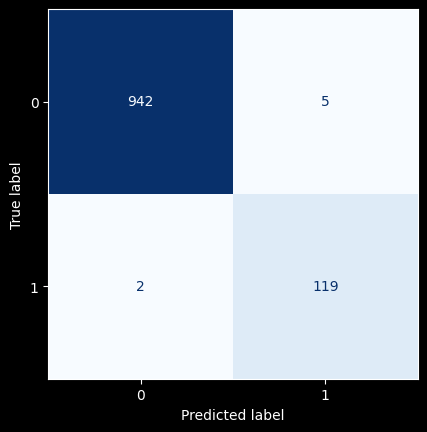

              precision    recall  f1-score   support

           0     0.9979    0.9947    0.9963       947
           1     0.9597    0.9835    0.9714       121

    accuracy                         0.9934      1068
   macro avg     0.9788    0.9891    0.9839      1068
weighted avg     0.9936    0.9934    0.9935      1068

0.9890956216673794


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

model = keras.models.load_model("test_with_preprocessed_128.keras")
prediction = model.predict(test_DS)
prediction[prediction>=0.5] = 1
prediction[prediction<0.5] = 0

cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.show()

print(classification_report(y_test, prediction, digits=4))
print(roc_auc_score(y_test, prediction))

In [ ]:
prediction = np.squeeze(prediction)

In [ ]:
np.where(prediction!=y_test)

(array([683, 694, 763, 814, 853, 896, 953]),)

In [ ]:
idx = 953

print(X_test.iloc[idx])
print(y_test.iloc[idx])
print(prediction[idx])

1. acute pontine infarction, left.
2. old infarctions in both frontal lobe, both bg.
3. diffuse brain atrophy.
4. left va occlusion.


0
1.0
